In [ ]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'


main_subhalo_id=329508
main_halo_id=23

missing_data_snaps=[64,67,68]
snap_number=99

In [ ]:
def Binary_DataIter(Data_Set1,Data_Set2):
    for i in range(0,min(len(Data_Set1),len(Data_Set2))):
        yield Data_Set1[i],Data_Set2[i]
        

In [ ]:
tree_fields=['SubfindID','SnapNum']
subfindid_snapnum_tree=il.sublink.loadTree(basePath, 99, 329508, fields=tree_fields, onlyMPB=True)
subfind_id=subfindid_snapnum_tree['SubfindID']
snapshot_num=subfindid_snapnum_tree['SnapNum']

In [ ]:
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfind_id,snapshot_num):
    if current_snapshot_num in missing_data_snaps: continue
    if current_snapshot_num < 30: break
    
    gas_fields=['ElectronAbundance','InternalEnergy','Masses','Coordinates']
    cell_data=il.snapshot.loadSubhalo(basePath,current_snapshot_num,current_subfind_id,0,fields=gas_fields)
    
    gas_e_abundance=cell_data['ElectronAbundance'].astype(np.float64)
    gas_In_Energy=cell_data['InternalEnergy'].astype(np.float64)
    gas_mass=cell_data['Masses'].astype(np.float64)
    gas_coor=cell_data['Coordinates'].astype(np.float64)
    
    m_p=1.673E-24
    X_H=0.76
    unit_switching=1E10
    mean_molecular_weight=4*m_p/(1+3*X_H+4*X_H*gas_e_abundance)
    k_B=1.38E-16
    gas_cell_temperature_in_Kelvin=2/3*gas_In_Energy/k_B*unit_switching*mean_molecular_weight
    
    condition = (gas_cell_temperature_in_Kelvin < 10000)
    index = np.where(condition)[0]
    
    gas_coor_subset = gas_coor[index] 
    gas_mass_subset=gas_mass[index]
    
    plt.figure(figsize=(12, 12), dpi=200)

    GasCoorMin = gas_coor_subset.min(axis=0)
    GasCoorMax = gas_coor_subset.max(axis=0)
    plt.style.use("dark_background")
    bars=(GasCoorMax-GasCoorMin)
    h, _, _, image = plt.hist2d(gas_coor_subset[:, 1],
                            gas_coor_subset[:, 2],
                            weights=gas_mass_subset,#NeutralHydrogenAbundance,
                            
                            norm=mpl.colors.LogNorm(),
                            bins=(10*bars[1],10*bars[2]))
    plt.xlim([GasCoorMin[1],GasCoorMax[1]])
    plt.ylim([GasCoorMin[2],GasCoorMax[2]])
    plt.xlabel('y [ckpc/h]')
    plt.ylabel('z [ckpc/h]')
    #draw_circle = plt.Circle(( CircleCenter[1],  CircleCenter[2]), 150, fill=False)
    #plt.gcf().gca().add_artist(draw_circle)
    plt.colorbar(image)
    plt.gca().set_aspect(1)
    plt.savefig('./cold_gas/pic-{}.png'.format(current_snapshot_num))
    print(current_snapshot_num)
    plt.clf()

In [5]:
cold_gas_mass_list=[]
snapshot_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfind_id,snapshot_num):
    if current_snapshot_num in missing_data_snaps: continue
    if current_snapshot_num < 30: break
    
    gas_fields=['ElectronAbundance','InternalEnergy','Masses','Coordinates']
    cell_data=il.snapshot.loadSubhalo(basePath,current_snapshot_num,current_subfind_id,0,fields=gas_fields)
    
    gas_e_abundance=cell_data['ElectronAbundance'].astype(np.float64)
    gas_In_Energy=cell_data['InternalEnergy'].astype(np.float64)
    gas_mass=cell_data['Masses'].astype(np.float64)
    gas_coor=cell_data['Coordinates'].astype(np.float64)
    
    m_p=1.673E-24
    X_H=0.76
    unit_switching=1E10
    mean_molecular_weight=4*m_p/(1+3*X_H+4*X_H*gas_e_abundance)
    k_B=1.38E-16
    gas_cell_temperature_in_Kelvin=2/3*gas_In_Energy/k_B*unit_switching*mean_molecular_weight
    
    condition = (gas_cell_temperature_in_Kelvin < 10000)
    index = np.where(condition)[0]

    gas_mass_subset=gas_mass[index]
    
    cold_gas_mass=gas_mass_subset.sum()
    
    cold_gas_mass_list.append(cold_gas_mass)
    snapshot_list.append(current_snapshot_num)
    print(cold_gas_mass)

1.15230355299
1.13293593852
1.08022710377
1.07084146728
1.02321862765
0.446562959366
0.354061442851
0.430421450828
0.382631650524
0.362130743611
0.265652048755
0.0982707641566
0.0564116776462
0.0444386339054
0.0573189022485
0.000993920568817
0.116481855922
0.044448455697
0.00207737553524
0.00593253138709
0.120078675576


([<matplotlib.axis.XTick at 0x7fa346166668>,
 <a list of 12 Text xticklabel objects>)

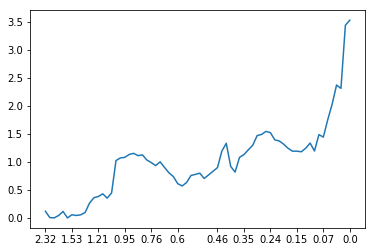

In [6]:
Z_list=[2.32,2.00, 1.90,1.74,1.67,1.60,1.53,1.50,1.41,1.36,1.30,1.25,1.21,1.15,1.11,1.07,1.04,1.00,0.95,0.92,0.89,0.85,0.82,0.79,0.76,0.73,0.7,0.68,0.64,0.62,0.6,0.58,0.55,0.52,0.5,0.48,0.46,0.44,0.42,0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.27,0.26,0.24,0.23,0.21,0.2,0.18,0.17,0.15,0.14,0.13,0.11,0.10,0.08,0.07,0.06,0.05,0.03,0.02,0.01,0.00]


mass_array=np.array(cold_gas_mass_list)
snapshot_array=np.array(snapshot_list)
z_array=np.flipud(np.array(Z_list))
plt.plot(snapshot_array,mass_array)
plt.xticks(snapshot_array[::6],z_array[::6])